<a href="https://colab.research.google.com/github/JuanDa14Sa/Travelling-Salesman-Problem/blob/main/TSP_HillClimbing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hill Climbing-TSP

In [2]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import timeit


def point_circle(center_x,center_y,radius):
    theta = 2*math.pi*random.random() #Entre 0 y 2pi

    r=radius*math.sqrt(random.random())

    x = r * math.cos(theta) + center_x
    y = r * math.sin(theta) + center_y
    return x,y

def gen_points(center_x,center_y,radius,num_points):
    points=[]
    for i in range(num_points):
        x,y=point_circle(center_x,center_y,radius)
        points.append((x,y))
    return points


def dist(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)

def matrix(points): 
    matrix_dist=[[dist(points[i],points[j])for j in range(len(points))] for i in range(len(points))]
    return matrix_dist

def route_len(R,matrix_dist_):  #Fitness
    sum=0
    for i in range(len(R)-1):
        sum=sum+matrix_dist_[R[i]][R[i+1]]
    sum=sum+matrix_dist_[R[-1]][R[1]]
    return sum



def gen_route(num_points): 
    route=np.random.choice(range(num_points),replace=False,size=num_points)
    return route

def gen_candidatev2(solution,matrix_dist_): 
    candidates = []
    tmp=np.random.choice(len(solution),replace=False,size=2)
    i=tmp[0]
    j=tmp[1]
    candidate= solution.copy()
    candidate[i] = solution[j]  
    candidate[j] = solution[i]
    candidate_eval= route_len(candidate,matrix_dist_)
    return candidate, candidate_eval

def rand_hill_climbing(n_iterations,num_points,matrix_dist_):
    solution = gen_route(num_points)
    solution_eval = route_len(solution,matrix_dist_)
    values=[]
    for i in range(n_iterations):
            candidate,candidate_eval=gen_candidatev2(solution,matrix_dist_)
            values.append(solution_eval)
            if candidate_eval<=solution_eval:
                solution,solution_eval=candidate,candidate_eval

    return [solution, solution_eval,values]

In [5]:
num_points=200
points=gen_points(0,0,1,num_points)
matrix_dist=matrix(points)
solutions=[]


for _ in range(10):
    n_iterations = 100
    best, score,values = rand_hill_climbing(n_iterations,num_points,matrix_dist)
    solutions.append((best,score,values))
    # print('Done!>>>>>>>')
    # print('f(%s) = %f' % (best, score))
route,val,value=min(solutions,key=lambda x:x[1])

Veamos como se ve la ruta que genera el algoritmo:

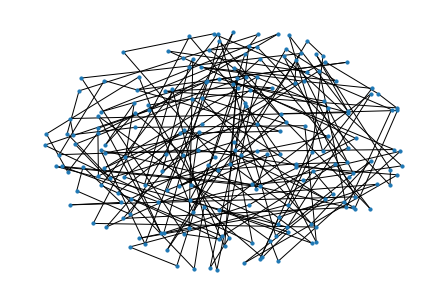

In [6]:
import networkx as nx

def plot_graph(points,route,node_size=10,width=1):
    G = nx.Graph()
    num_points=len(points)
    for i in range(num_points):
        G.add_node(i,pos=points[i])
        if i==num_points-1:
            G.add_edge(route[i],route[0])
        else:
            G.add_edge(route[i],route[i+1])

    nx.draw(G,nx.get_node_attributes(G, 'pos'),node_size=node_size,width=width)
plot_graph(points,route)


Y veamos como se reduce la longitud de la ruta en cada iteración:

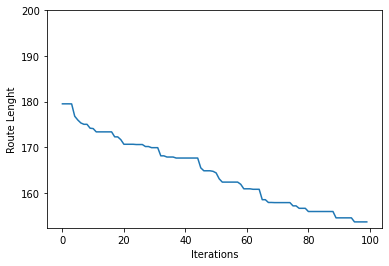

In [7]:
def plot_length(num_iterations,data):
    plt.plot(range(num_iterations),data)
    plt.ylabel('Route Lenght')
    plt.xlabel('Iterations')
    plt.ylim(top=num_points)
plot_length(n_iterations,value)

Finalmente ejecutamos el algoritmo con $100,200,500,1000,1500,2000,3000,4000,5000$ y $10000$ puntos:

In [8]:
n_iterations = 100

n_=[100,200,500,1000,1500,2000,3000,4000,5000,10000]



times=[]
lengths=[]
for num_point_ in n_:
    points=gen_points(0,0,1,num_point_)
    matrix_dist=matrix(points)
    solutions=[]
    start=timeit.default_timer()
    for _ in range(10):
        best, score,values = rand_hill_climbing(n_iterations,num_point_,matrix_dist)
        solutions.append((best,score,values))
        # print('Done!>>>>>>>')
        # print('f(%s) = %f' % (best, score))
    route,val,value=min(solutions,key=lambda x:x[1])
    end=timeit.default_timer()
    times.append(end-start)
    lengths.append(val)


La gráfica de tiempos obtenidos:

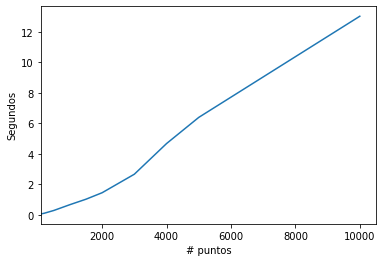

In [9]:
plt.plot(n_,times)
plt.xlim(left=100)
plt.ylabel('Segundos')
plt.xlabel('# puntos');

La gráfica de las longitudes de la solución hallada:

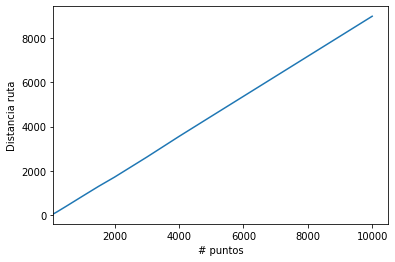

In [10]:
plt.plot(n_,lengths)
plt.xlim(left=100)
plt.xlabel('# puntos')
plt.ylabel('Distancia ruta');